In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


# Data Cleaning

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")

In [3]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
df.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [5]:
df = df.rename(columns = {"temparature":"temperature"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temperature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [7]:
df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temperature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print(df['rainfall'].value_counts(normalize=True))

rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


# EDA

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temperature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [11]:
df.nunique()

id               2190
day               365
pressure          236
maxtemp           219
temperature       198
mintemp           199
dewpoint          218
humidity           49
cloud              78
sunshine          120
winddirection      35
windspeed         223
rainfall            2
dtype: int64

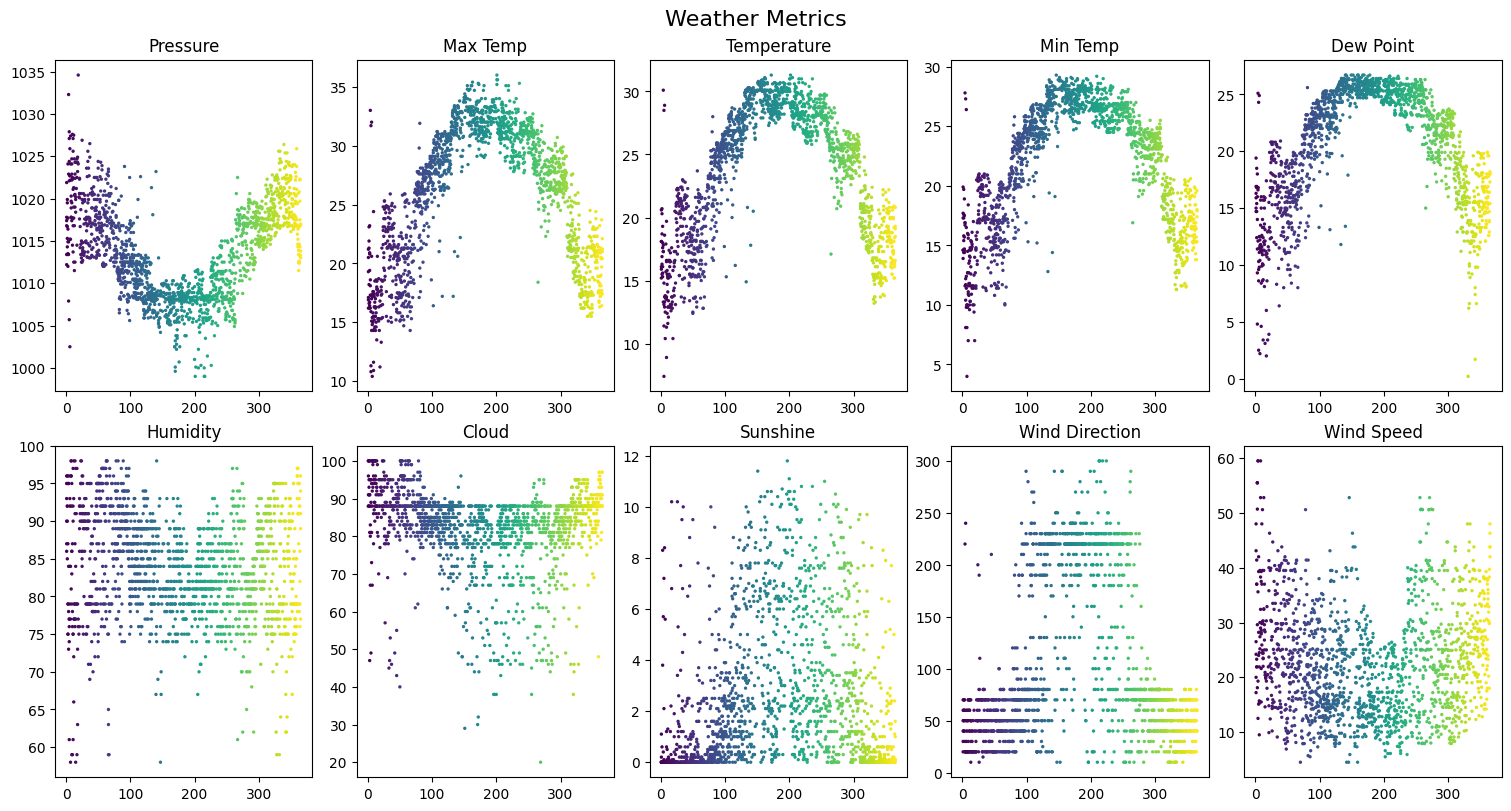

In [12]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(2, 5, figsize=(15, 8), layout='constrained')
axes = ax.flatten()

sdf = df[df['rainfall'] == 1]
z = sdf["day"]

axes[0].scatter(z, sdf["pressure"],c =z , cmap = "viridis", s=2)
axes[0].set_title("Pressure")

axes[1].scatter(z, sdf["maxtemp"] ,c =z , cmap = "viridis",  s=2)
axes[1].set_title("Max Temp")

axes[2].scatter(z, sdf["temperature"],c =z , cmap = "viridis",  s=2)
axes[2].set_title("Temperature")

axes[3].scatter(z, sdf["mintemp"],c =z , cmap = "viridis",  s=2)
axes[3].set_title("Min Temp")

axes[4].scatter(z, sdf["dewpoint"],c =z , cmap = "viridis",  s=2)
axes[4].set_title("Dew Point")

axes[5].scatter(z, sdf["humidity"],c =z , cmap = "viridis",  s=2)
axes[5].set_title("Humidity")

axes[6].scatter(z, sdf["cloud"],c =z , cmap = "viridis",  s=2)
axes[6].set_title("Cloud")

axes[7].scatter(z, sdf["sunshine"],c =z , cmap = "viridis",  s=2)
axes[7].set_title("Sunshine")

axes[8].scatter(z, sdf["winddirection"],c =z , cmap = "viridis",  s=2)
axes[8].set_title("Wind Direction")

axes[9].scatter(z, sdf["windspeed"],c =z , cmap = "viridis",  s=2)
axes[9].set_title("Wind Speed")

fig.suptitle("Weather Metrics", fontsize=16)
plt.show()


In [13]:
# feature selection
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(df ,df['rainfall'])
mi_df = pd.Series(mi_scores, index=df.columns).sort_values(ascending=False)
print(mi_df)

rainfall         0.558998
cloud            0.212831
sunshine         0.162116
humidity         0.137897
day              0.073127
id               0.069620
temperature      0.043065
dewpoint         0.026086
maxtemp          0.023225
pressure         0.014825
mintemp          0.008458
winddirection    0.008044
windspeed        0.002788
dtype: float64


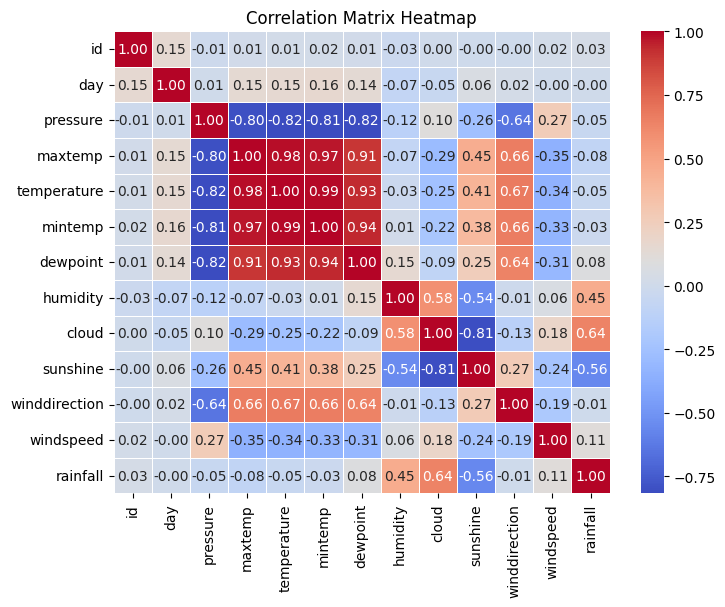

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
features = [
 'humidity', 'cloud', 'sunshine', 'windspeed'
]
target = 'rainfall'

In [16]:
x_train ,y_train  = df[features] , df[target] 

In [17]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state =0 , class_weight = 'balanced' ).fit(x_train, y_train)
reg.score(x_train, y_train)

0.8415525114155251

In [18]:
test_df = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
test_df = test_df.rename(columns = {"temparature":"temperature"})



mask = test_df[features].notna().all(axis=1)

valid_x = test_df.loc[mask, features]
valid_pred = reg.predict(valid_x)
y_pred = pd.Series(np.nan, index=test_df.index)
y_pred[mask] = valid_pred
y_pred = y_pred.fillna('')

submission = pd.DataFrame({
    'id': test_df['id'],
    'rainfall': y_pred
})

submission.to_csv('submission.csv', index=False)



In [19]:
import os
print(os.listdir("/kaggle/working"))

['__notebook__.ipynb', 'submission.csv']
